<a id='Part 2'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Part 1
  
#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ff7b56;"> Question :<BR> 
    

In [1]:
# Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
%matplotlib inline

1. Data Understanding:<BR>
a. Read all the 3 CSV files as DataFrame and store them into 3 separate variables. [1 Mark]<BR>
b. Print Shape and columns of all the 3 DataFrames. [1 Mark]<BR>
c. Compare Column names of all the 3 DataFrames and clearly write observations. [1 Mark]<BR>
d. Print DataTypes of all the 3 DataFrames. [1 Mark]<BR>
    
<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3d500;"> Solution :

In [2]:
# Importing Datasets from file (Step a)
tb1 = pd.read_csv('Normal.csv')
tb1 = pd.DataFrame(tb1)
tb2 = pd.read_csv('Type_H.csv')
tb2 = pd.DataFrame(tb2)
tb3 = pd.read_csv('Type_s.csv')
tb3 = pd.DataFrame(tb3)
tb3.head(3)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,74.377678,32.053104,78.772013,42.324573,143.560690,56.125906,Type_S
1,89.680567,32.704435,83.130732,56.976132,129.955476,92.027277,Type_S
2,44.529051,9.433234,52.000000,35.095817,134.711772,29.106575,Type_S


In [3]:
#(Step b)
tb2.head(3)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,63.027817,22.552586,39.609117,40.475232,98.672917,-0.254400,Type_H
1,39.056951,10.060991,25.015378,28.995960,114.405425,4.564259,Type_H
2,68.832021,22.218482,50.092194,46.613539,105.985135,-3.530317,Type_H


In [4]:
tb1.head(3)

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal


In [5]:
for col in tb1.columns:
    print(col)

P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


In [6]:
for col in tb2.columns:
    print(col)

P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


In [7]:
for col in tb3.columns:
    print(col)

P_incidence
P_tilt
L_angle
S_slope
P_radius
S_Degree
Class


In [8]:
#(Step d)
tb1.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [9]:
print(tb1.shape)

(100, 7)


In [10]:
print(tb2.shape)

(60, 7)


In [11]:
tb2.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [12]:
tb3.dtypes

P_incidence    float64
P_tilt         float64
L_angle        float64
S_slope        float64
P_radius       float64
S_Degree       float64
Class           object
dtype: object

In [13]:
print(tb3.shape)

(150, 7)


From the coloumn name and data its clear that the dataframes all the three data frames have the same column with mostly continous vaules and these 3 different data sets are there on bais of different classes.

In [14]:
#(Step 2.b)
tb4=pd.concat((tb1, tb2, tb3), axis=0, sort=False)

In [15]:
tb4.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


In [16]:
#(Step e)
tb4.Class.unique()

array(['Normal', 'Nrmal', 'Type_H', 'type_h', 'Type_S', 'tp_s'],
      dtype=object)

2. Data Preparation and Exploration: <BR>
a. Unify all the variations in ‘Class’ feature for all the 3 DataFrames. [1 Marks]<BR>
For Example: ‘tp_s’, ‘Type_S’, ‘type_s’ should be converted to ‘type_s’<BR>
b. Combine all the 3 DataFrames to form a single DataFrame [1 Marks]<BR>
   Checkpoint: Expected Output shape = (310,7)<BR>
c. Print 5 random samples of this DataFrame [1 Marks]<BR>
d. Print Feature-wise percentage of Null values. [1 Mark]<BR>
e. Check 5-point summary of the new DataFrame. [1 Mark]<BR>


In [17]:
#(step a)
tb4["Class"].replace({"Nrmal":"Normal", "type_h":"Type_H", "tp_s":"Type_S"}, inplace= True)

In [18]:
tb4.Class.unique()

array(['Normal', 'Type_H', 'Type_S'], dtype=object)

In [19]:
tb4.shape

(310, 7)

In [20]:
#(step c)
t=tb4.sample(n=5)
t

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
37,74.720746,19.756942,82.735360,54.963804,109.356594,33.306067,Type_S
140,63.364339,20.024621,67.498705,43.339718,130.999258,37.556706,Type_S
44,56.030218,16.297915,62.275275,39.732303,114.023117,-2.325684,Type_H
102,118.144655,38.449501,50.838520,79.695154,81.024541,74.043767,Type_S
85,46.426366,6.620795,48.100000,39.805571,130.350096,2.449382,Normal


In [21]:
#(step d)
(((tb4.isna().sum())/310)*100)

P_incidence    0.0
P_tilt         0.0
L_angle        0.0
S_slope        0.0
P_radius       0.0
S_Degree       0.0
Class          0.0
dtype: float64

No Null values

In [22]:
#(step e)
tb4.describe().T

,count,mean,std,min,25%,50%,75%,max
P_incidence,310.0,60.496653,17.236520,26.147921,46.430294,58.691038,72.877696,129.834041
P_tilt,310.0,17.542822,10.008330,-6.554948,10.667069,16.357689,22.120395,49.431864
L_angle,310.0,51.930930,18.554064,14.000000,37.000000,49.562398,63.000000,125.742385
S_slope,310.0,42.953831,13.423102,13.366931,33.347122,42.404912,52.695888,121.429566
P_radius,310.0,117.920655,13.317377,70.082575,110.709196,118.268178,125.467674,163.071041
S_Degree,310.0,26.296694,37.559027,-11.058179,1.603727,11.767934,41.287352,418.543082


P_incidence , P_tilt , L_Angle, S_slope seems to be Normally distributed 
S_degree seem to be right sekewed

In [23]:
tb4.head()

,P_incidence,P_tilt,L_angle,S_slope,P_radius,S_Degree,Class
0,38.505273,16.964297,35.112814,21.540976,127.632875,7.986683,Normal
1,54.920858,18.968430,51.601455,35.952428,125.846646,2.001642,Normal
2,44.362490,8.945435,46.902096,35.417055,129.220682,4.994195,Normal
3,48.318931,17.452121,48.000000,30.866809,128.980308,-0.910941,Normal
4,45.701789,10.659859,42.577846,35.041929,130.178314,-3.388910,Normal


3. Data Analysis: <BR>
a. Visualize a heatmap to understand correlation between all features [2 Marks]<BR>
b. Share insights on correlation. [2 Marks]<BR>
i. Features having stronger correlation with correlation value.<BR>
ii. Features having weaker correlation with correlation value.<BR>
c. Visualize a pairplot with 3 classes distinguished by colors and share insights. [2 Marks]<BR>
d. Visualize a jointplot for ‘P_incidence’ and ‘S_slope’ and share insights. [2 Marks]<BR>
e. Visualize a boxplot to check distribution of the features and share insights. [2 Marks]<BR>

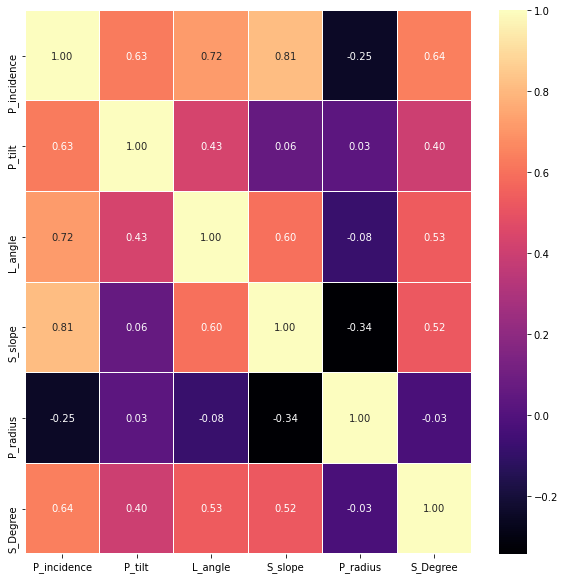

In [24]:
# the color intensity 
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(tb4.corr(), ax=ax, annot=True, linewidths=0.05, fmt= '.2f',cmap="magma") 
plt.show()

    I.>  L_angle and slope show very strong corelation<BR>
    II.> P_radious and P Tilt show very week corelation

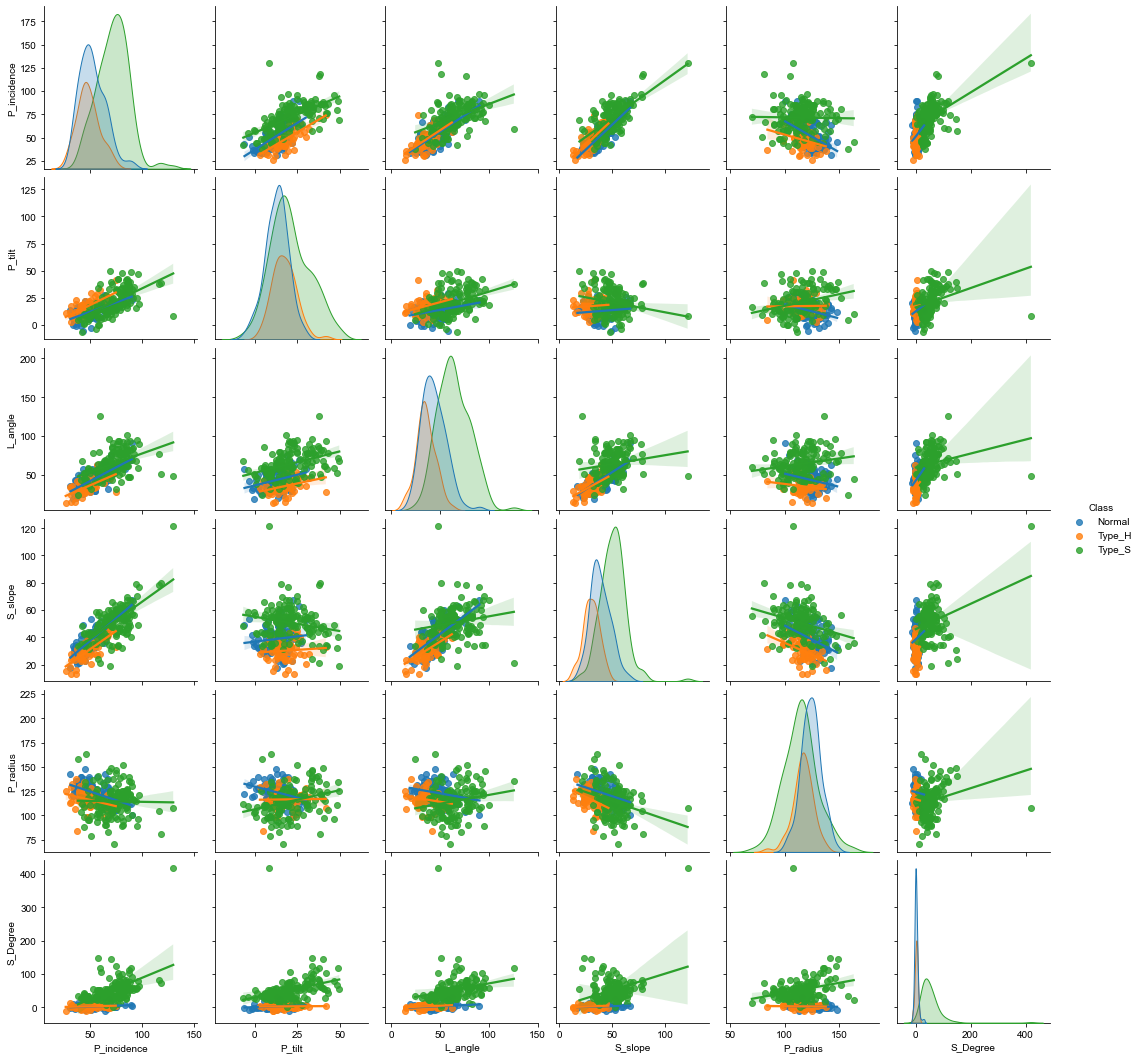

In [25]:
# plots scatter plots for every pair of attributes and histograms along the diagonal
sns.pairplot(tb4, kind="reg", hue="Class")  
sns.set_theme(style="whitegrid")
plt.show()

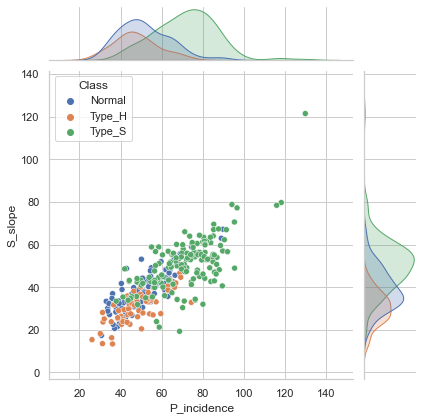

In [26]:
sns.jointplot(x=tb4.P_incidence, y=tb4.S_slope, data=tb4, hue='Class')

The graph seems to have a very strong corealtion it kind of making a straight line.

<AxesSubplot:xlabel='P_incidence'>

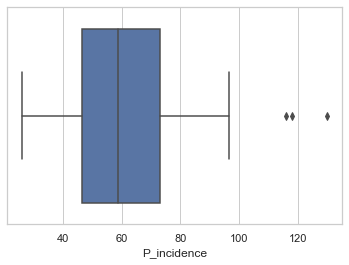

In [27]:
sns.boxplot(x=tb4["P_incidence"])

There are 3 Upper outliers<BR>
Min value=26.14<BR>
Max Value=129.87<BR>
IQ25=46.43<BR>
IQ75=72.87<BR>
IQR=26.44<BR>

<AxesSubplot:xlabel='P_tilt'>

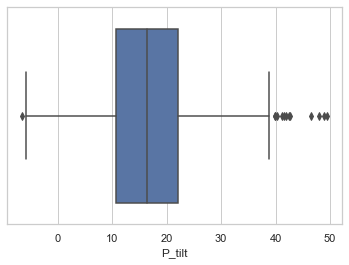

In [28]:
sns.boxplot(x=tb4["P_tilt"])

There are quite a few Upper outliers<BR>
Min value=-6.55<BR>
Max Value=49.43<BR>
IQ25=10.66<BR>
IQ75=22.12<BR>
IQR=26.11.46

<AxesSubplot:xlabel='L_angle'>

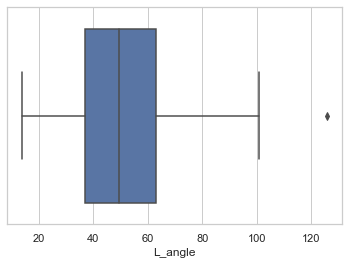

In [29]:
sns.boxplot(x=tb4["L_angle"])

There are 1 Upper outliers<BR>
Min value=14<BR>
Max Value=125.47<BR>
IQ25=37<BR>
IQ75=63<BR>
IQR=26

<AxesSubplot:xlabel='S_slope'>

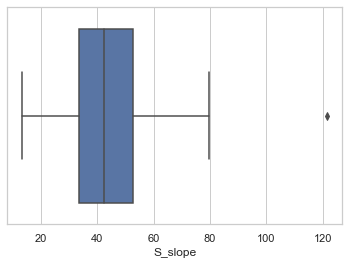

In [30]:
sns.boxplot(x=tb4["S_slope"])

There are 1 Uper outliers<BR>
Min value=14<BR>
Max Value=125.47<BR>
IQ25=37<BR>
IQ75=63<BR>
IQR=26

<AxesSubplot:xlabel='P_radius'>

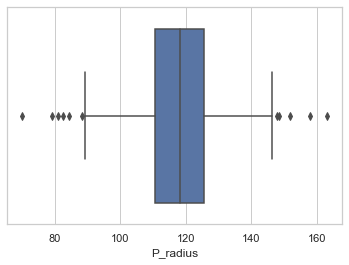

In [31]:
sns.boxplot(x=tb4["P_radius"])

There are quite a few Uper and lower outliers<BR>
Min value=70.08<BR>
Max Value=163.07<BR>
IQ25=110.70<BR>
IQ75=125.46<BR>
IQR=14.76

<AxesSubplot:xlabel='S_Degree'>

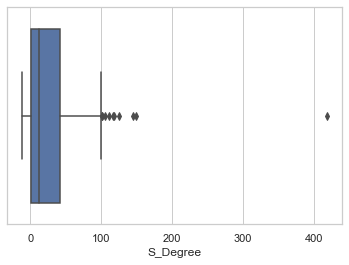

In [32]:
sns.boxplot(x=tb4["S_Degree"])

There are quite a few Uper outliers and one of them is really extreme<BR>
Min value=71.05<BR>
Max Value=418.54<BR>
IQ25=1.66<BR>
IQ75=41.20<BR>
IQR=39.54

4. Model Building: <BR>
a. Split data into X and Y. [1 Marks]<BR>
b. Split data into train and test with 80:20 proportion. [1 Marks]<BR>
c. Train a Supervised Learning Classification base model using KNN classifier. [2 Marks]<BR>
d. Print all the possible classification metrics for both train and test data. [2 Marks]<BR>

In [33]:
#split the dataset into training and test datasets
# Transform data into features and target
X = np.array(tb4.iloc[:, 0:6]) 
y= np.array(tb4['Class']) 
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(248, 6)
(248,)
(62, 6)
(62,)


In [34]:
#Use k=3 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors =1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_predict = knn.predict(X_test)
print("Accuracy : %1.4f " %accuracy_score(y_test, y_predict))
print("Precision: %1.4f "  %precision_score(y_test, y_predict, average='micro'))
print("Recall: %1.4f "  %recall_score(y_test, y_predict, average='micro'))

Accuracy : 0.7419 
Precision: 0.7419 
Recall: 0.7419 


<AxesSubplot:>

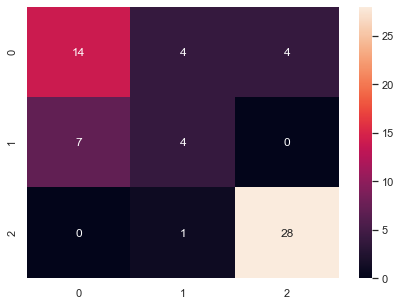

In [35]:
df_cm= confusion_matrix(y_test, y_predict)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

5. Performance Improvement: <BR>
a. Tune the parameters/hyperparameters to improve the performance of the base model. [2 Marks]<BR>
b. Clearly showcase improvement in performance achieved. [1 Marks]<BR>
For Example:<BR>
i. Accuracy: +15% improvement<BR>
ii. Precision: +10% improvement.<BR>
c. Clearly state which parameters contributed most to improve model performance.<BR>
What could be the probable reason? [1 Marks]<BR>

In [38]:
#hyperturing parameter
# creating odd list of K for KNN
myList = list(range(1,20))
# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)
# changing to misclassification error
MSE = [1 - x for x in ac_scores]
# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 9


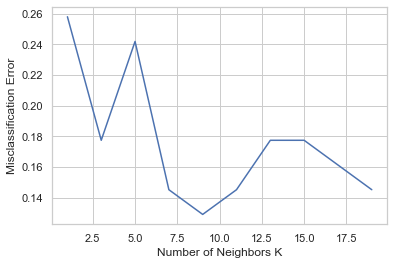

In [39]:
import matplotlib.pyplot as plt
# plot misclassification error vs k
plt.plot(neighbors, MSE)
plt.xlabel('Number of Neighbors K')
plt.ylabel('Misclassification Error')
plt.show()

In [40]:
#Use k=3 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors =9)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_predict = knn.predict(X_test)
print("Accuracy : %1.4f " %accuracy_score(y_test, y_predict))
print("Precision: %1.4f "  %precision_score(y_test, y_predict, average='micro'))
print("Recall   : %1.4f "  %recall_score(y_test, y_predict, average='micro'))

Accuracy : 0.8710 
Precision: 0.8710 
Recall   : 0.8710 


<AxesSubplot:>

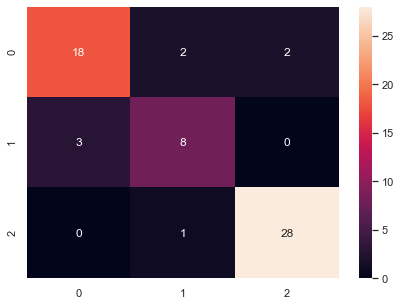

In [41]:
df_cm= confusion_matrix(y_test, y_predict)
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)

Thus its clear that :<BR>
Accuracy  is improved by :13% (Approx)<BR>
Precision is improved by :13% (Approx)<BR>
Recall     is improved by  :13% (Approx)<BR>

<a id='Part 2'></a>

## <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#00b3e5;">  Part 2
  
#### <span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#ff7b56;"> Question:
1. Data Understanding and Preparation:<BR>
a. Read both the Datasets ‘Data1’ and ‘Data 2’ as DataFrame and store them into two separate
variables. [1 Mark]<BR>
b. Print shape and Column Names and DataTypes of both the Dataframes. [1 Mark]<BR>
c. Merge both the Dataframes on ‘ID’ feature to form a single DataFrame [2 Marks]<BR>
d. Change Datatype of below features to ‘Object’ [1 Mark]<BR>
‘CreditCard’, ‘InternetBanking’, ‘FixedDepositAccount’, ‘Security’, ‘Level’, ‘HiddenScore’.<BR>



<span style="font-family: Arial; font-weight:bold;font-size:1.5em;color:#c3d500;"> Solution :

In [42]:
# Importing Datasets from file (Step a)
dataset1 = pd.read_csv('Data1.csv')
dataset1 = pd.DataFrame(dataset1)
dataset2 = pd.read_csv('Data2.csv')
dataset2 = pd.DataFrame(dataset2)
dataset1.head(3)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level
0,1,25,1,49,91107,4,1.6,1
1,2,45,19,34,90089,3,1.5,1
2,3,39,15,11,94720,1,1.0,1


In [43]:
dataset2.head(3)

,ID,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,0,1,0,0,0,NaN
1,2,0,1,0,0,0,NaN
2,3,0,0,0,0,0,NaN


In [44]:
#printing Shape of the datasets (step b)
Shape1=dataset1.shape
Shape2=dataset2.shape
print('\033[1m' + 'Dataset1 Shape : ' , Shape1 )
print('\033[1m' + 'Dataset2 Shape : ' , Shape2 )

Dataset1 Shape :  (5000, 8)
Dataset2 Shape :  (5000, 7)


In [45]:
#inner Join both data sets on ID (step c)
combinedDataset = pd.merge(dataset1,dataset2, how='inner', on = 'ID')
combinedDataset.shape

(5000, 14)

In [46]:
combinedDataset.head(5)

,ID,Age,CustomerSince,HighestSpend,ZipCode,HiddenScore,MonthlyAverageSpend,Level,Mortgage,Security,FixedDepositAccount,InternetBanking,CreditCard,LoanOnCard
0,1,25,1,49,91107,4,1.6,1,0,1,0,0,0,NaN
1,2,45,19,34,90089,3,1.5,1,0,1,0,0,0,NaN
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,NaN
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,NaN
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,1,NaN


In [47]:
combinedDataset.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore              int64
MonthlyAverageSpend    float64
Level                    int64
Mortgage                 int64
Security                 int64
FixedDepositAccount      int64
InternetBanking          int64
CreditCard               int64
LoanOnCard             float64
dtype: object

In [48]:
#changing the data types of required columns (step d)
combinedDataset['HiddenScore']= combinedDataset['HiddenScore'].astype(str)
combinedDataset['Level']= combinedDataset['Level'].astype(str)
combinedDataset['Security']= combinedDataset['Security'].astype(str)
combinedDataset['FixedDepositAccount']= combinedDataset['FixedDepositAccount'].astype(str)
combinedDataset['InternetBanking']= combinedDataset['InternetBanking'].astype(str)
combinedDataset['CreditCard']= combinedDataset['CreditCard'].astype(str)
combinedDataset.dtypes

ID                       int64
Age                      int64
CustomerSince            int64
HighestSpend             int64
ZipCode                  int64
HiddenScore             object
MonthlyAverageSpend    float64
Level                   object
Mortgage                 int64
Security                object
FixedDepositAccount     object
InternetBanking         object
CreditCard              object
LoanOnCard             float64
dtype: object

#### 2. Data Exploration and Analysis: <BR>
a. Visualize distribution of Target variable ‘LoanOnCard’ and clearly share insights. [2 Marks]<BR>
b. Check the percentage of missing values and impute if required. [1 Mark]<BR>
c. Check for unexpected values in each categorical variable and impute with best suitable value.<BR>

C:\Users\Akhilesh Razdan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


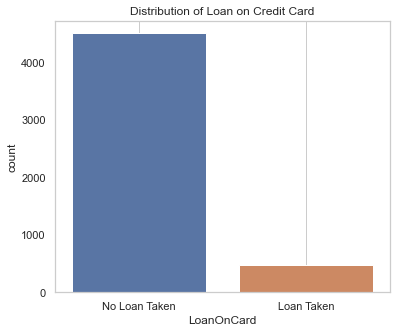

In [49]:
#Ploting a count plot for Loan on Credit Card (Part a)
fig,ax = plt.subplots(figsize=(6, 5))
PLOT=sns.countplot(combinedDataset.LoanOnCard)
PLOT.set_xticklabels(['No Loan Taken','Loan Taken'])
plt.title('Distribution of Loan on Credit Card')
plt.grid()
plt.show()

In [50]:
combinedDataset.LoanOnCard.value_counts()

0.0    4500
1.0     480
Name: LoanOnCard, dtype: int64

#### From the above plot and data its clear that there are far more Indiduals who have not taken loan on credit card that people who have taken it. To say only 10 %(Approx) people taken taken loan on Credit cards.

In [51]:
# Finding Missing Values (Part b)
(combinedDataset.isnull().sum()/5000)*100

ID                     0.0
Age                    0.0
CustomerSince          0.0
HighestSpend           0.0
ZipCode                0.0
HiddenScore            0.0
MonthlyAverageSpend    0.0
Level                  0.0
Mortgage               0.0
Security               0.0
FixedDepositAccount    0.0
InternetBanking        0.0
CreditCard             0.0
LoanOnCard             0.4
dtype: float64

In [52]:
# Imputing Missing Values
Filtereddata = combinedDataset.dropna().copy(deep=True)
Filtereddata.shape

(4980, 14)

In [53]:
# finding Unexpected Values (Part c)
for value in ['HiddenScore','Level','Security','FixedDepositAccount','InternetBanking','CreditCard','LoanOnCard','CustomerSince', 'HighestSpend', 'MonthlyAverageSpend', 'Mortgage', 'Age']:
    print(value,":", sum(Filtereddata[value] == '?'))
    

HiddenScore : 0
Level : 0
Security : 0
FixedDepositAccount : 0
InternetBanking : 0
CreditCard : 0
LoanOnCard : 0
CustomerSince : 0
HighestSpend : 0
MonthlyAverageSpend : 0
Mortgage : 0
Age : 0


In [54]:
for value in ['Security','FixedDepositAccount','InternetBanking','CreditCard']:
         print(value,":", sum(Filtereddata[value] < '0'))

Security : 0
FixedDepositAccount : 0
InternetBanking : 0
CreditCard : 0


In [55]:
for value in ['Security','FixedDepositAccount','InternetBanking','CreditCard']:
         print(value,":", sum(Filtereddata[value] > '1'))

Security : 0
FixedDepositAccount : 0
InternetBanking : 0
CreditCard : 0


In [56]:
 print("HiddenScore Count <1:", sum(Filtereddata['HiddenScore'] < '1'))
 print("HiddenScore Count >4:", sum(Filtereddata['HiddenScore'] > '4'))
 print("Level Count <1:", sum(Filtereddata['Level'] < '1'))
 print("Level Count >3:", sum(Filtereddata['Level'] > '3'))
 print("LoanOnCard Count <0", sum(Filtereddata['LoanOnCard'] < 0 ))
 print("LoanOnCard Count >1:", sum(Filtereddata['LoanOnCard'] > 1 ))   

HiddenScore Count <1: 0
HiddenScore Count >4: 0
Level Count <1: 0
Level Count >3: 0
LoanOnCard Count <0 0
LoanOnCard Count >1: 0


In [57]:
for value in ['Level', 'HiddenScore','LoanOnCard','Security','FixedDepositAccount','InternetBanking','CreditCard']:
        print(value,":", sum(Filtereddata[value] == 'a'))

Level : 0
HiddenScore : 0
LoanOnCard : 0
Security : 0
FixedDepositAccount : 0
InternetBanking : 0
CreditCard : 0


##### Seems there is not unexpected values

3. Data Preparation and model building: <BR>
a. Split data into X and Y. [1 Mark]<BR>
[Recommended to drop ID & ZipCode. LoanOnCard is target Variable]<BR>
b. Split data into train and test. Keep 25% data reserved for testing. [1 Mark]<BR>
c. Train a Supervised Learning Classification base model - Logistic Regression. [2 Mark]<BR>
d. Print evaluation metrics for the model and clearly share insights. [1 Mark]<BR>
e. Balance the data using the right balancing technique. [2 Mark]<BR>
f. Again train the same previous model on balanced data. [1 Mark]<BR>
g. Print evaluation metrics and clearly share differences observed. [2 Mark]<BR>

In [58]:
Filtereddata.drop('ID',  axis=1, inplace=True)
Filtereddata.drop('ZipCode',  axis=1, inplace=True)

In [59]:
#split the dataset into training and test datasets
# Transform data into features and target
X = np.array(Filtereddata.iloc[:, 1:11]) 
y= np.array(Filtereddata['LoanOnCard']) 

In [60]:
# split into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=19)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(3735, 10)
(3735,)
(1245, 10)
(1245,)


Accuracy : 0.9446 
Recall : 0.9446 
Model score : 0.9446 


<AxesSubplot:>

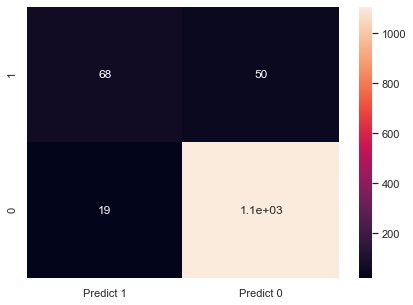

In [61]:
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train, y_train)
#predict on test
y_predict = model.predict(X_test)

print("Accuracy : %1.4f " %accuracy_score(y_test, y_predict))
print("Recall : %1.4f "  %recall_score(y_test, y_predict, average='micro'))


model_score = model.score(X_test, y_test)
print("Model score : %1.4f " %model_score)
cm=metrics.confusion_matrix(y_test, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


The confusion matrix

True Positives (TP): we correctly predicted that they do have loan on credit card 75

True Negatives (TN): we correctly predicted that they don't have loan on credit card 1100

False Positives (FP): we incorrectly predicted that they do have loan on credit card (a "Type I error") 16 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have loan on credit card (a "Type II error") 55 Falsely predict negative Type II error

(3486, 10)
(3486,)
(1494, 10)
(1494,)
Accuracy : 0.9538 
Recall : 0.9538 
Model score : 0.9538 


<AxesSubplot:>

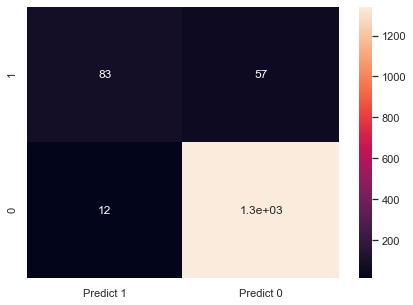

In [71]:
# resampinging to improve accuracy and recall
# split into train and test
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y, test_size=0.30, random_state=3)
print(X_train_n.shape)
print(y_train_n.shape)
print(X_test_n.shape)
print(y_test_n.shape)
# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(X_train_n, y_train_n)
#predict on test
y_predict = model.predict(X_test_n)

print("Accuracy : %1.4f " %accuracy_score(y_test_n, y_predict))
print("Recall : %1.4f "  %recall_score(y_test_n, y_predict, average='micro'))

model_score = model.score(X_test_n, y_test_n)
print("Model score : %1.4f " %model_score)

cm=metrics.confusion_matrix(y_test_n, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)


The confusion matrix

True Positives (TP): we correctly predicted that they do have loan on credit card 69

True Negatives (TN): we correctly predicted that they don't have loan on credit card 1300

False Positives (FP): we incorrectly predicted that they do have loan on credit card (a "Type I error") 11 Falsely predict positive Type I error

False Negatives (FN): we incorrectly predicted that they don't have loan on credit card (a "Type II error") 43 Falsely predict negative Type II error

In [63]:
# SVM Model
clf = svm.SVC(gamma=0.010, C=95) 
clf.fit(X_train_n , y_train_n)
y_predict = clf.predict(X_test_n)


print("Accuracy : %1.4f " %accuracy_score(y_test_n, y_predict))
print("Recall : %1.4f "  %recall_score(y_test_n, y_predict))


model_score = clf.score(X_test_n, y_test_n)
print("Model score : %1.4f " %model_score)

Accuracy : 0.9451 
Recall : 0.5500 
Model score : 0.9451 


In [64]:
#Use k=3 as the final model for prediction
knn = KNeighborsClassifier(n_neighbors = 1)

# fitting the model
knn.fit(X_train, y_train)

# predict the response
y_predict = knn.predict(X_test)

# evaluate accuracy
print("Accuracy : %1.4f " %accuracy_score(y_test, y_predict))
print("Recall : %1.4f "  %recall_score(y_test, y_predict))

Accuracy : 0.9181 
Recall : 0.5339 


In [65]:
#hyperturing parameter
# creating odd list of K for KNN
myList = list(range(1,20))

# subsetting just the odd ones
neighbors = list(filter(lambda x: x % 2 != 0, myList))

# empty list that will hold accuracy scores
ac_scores = []

# perform accuracy metrics for values from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    # predict the response
    y_pred = knn.predict(X_test)
    # evaluate accuracy
    scores = accuracy_score(y_test, y_pred)
    ac_scores.append(scores)

# changing to misclassification error
MSE = [1 - x for x in ac_scores]

# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d" % optimal_k)

The optimal number of neighbors is 1


Thus best model will be  Logistic Regression wih balanced technique the improvement is:<BR> <BR>
Acuracy increased by 1.3% <BR>
Recall impovered by 1.3% <BR>

<AxesSubplot:>

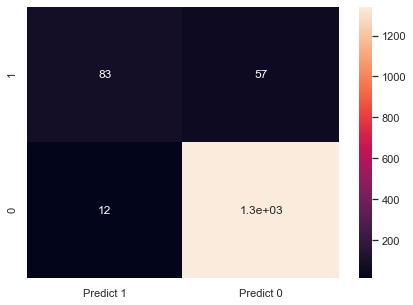

In [72]:
# Confusion matriax for the Model selected.
cm=metrics.confusion_matrix(y_test_n, y_predict, labels=[1, 0])

df_cm = pd.DataFrame(cm, index = [i for i in ["1","0"]],
                  columns = [i for i in ["Predict 1","Predict 0"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True)
